In [1]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt

In [2]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\DMQA\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
df2 = pd.read_csv('C:/Users/DMQA/DATA2.csv', encoding = 'euc-kr')

In [4]:
df2.head()[:2]

,review,ord,ord_group
0,주행중지: 출발후 약 200M 지점 기수 낙마,92,0
1,후미권 이끌었고 직선 순위도약 시도나 추입력 발휘안돼 고전,7,0


In [5]:
list_df2 = np.array(df2['review'].tolist())
print(list_df2)

['주행중지: 출발후 약 200M 지점 기수 낙마' '후미권 이끌었고 직선 순위도약 시도나 추입력 발휘안돼 고전'
 '선행으로 경주를 주도했으나 직선막판 근소한 차이로 덜미잡혀' ... '선두권 후미공략이나 직선 강한모습을 못보여줌'
 '(스포츠조선배)-후미권에서 순위좁히지못해' '후미권 이끌며 순위도약을 노렸으나 직선지친모습']


In [6]:
okt = Okt()

In [7]:
text = '선행으로경주를주도했으나직선막판근소한차이로덜미잡혀'
print(okt.morphs(text))

['선행', '으로', '경주', '를', '주도했으나', '직선', '막판', '근소', '한', '차이', '로', '덜미', '잡혀']


In [10]:
nouns_review_df2 = []
for text in list_df2 : 
    nouns_review_df2.append(okt.nouns(text))

In [11]:
morphs_review_df2 = []
for text in list_df2 : 
    morphs_review_df2.append(okt.morphs(text))

In [12]:
print(nouns_review_df2[0:4])

[['주행', '중지', '출발', '후', '약', '지점', '기수', '낙마'], ['후미', '직선', '순위', '도약', '시도', '추', '입력', '발휘', '고전'], ['선행', '경주', '직선', '막판', '근소', '차이', '덜미'], ['전반', '후미', '못', '모습']]


In [13]:
print(morphs_review_df2[0:4])

[['주행', '중지', ':', '출발', '후', '약', '200', 'M', '지점', '기수', '낙마'], ['후미', '권', '이끌었고', '직선', '순위', '도약', '시도', '나', '추', '입력', '발휘', '안', '돼', '고전'], ['선행', '으로', '경주', '를', '주도했으나', '직선', '막판', '근소', '한', '차이', '로', '덜미', '잡혀'], ['경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습']]


In [14]:
import itertools

list_corpus = []
for x in morphs_review_df2 :
    list_corpus.append(x)
    
merged_c = list(itertools.chain.from_iterable(list_corpus))
print(merged_c)

['주행', '중지', ':', '출발', '후', '약', '200', 'M', '지점', '기수', '낙마', '후미', '권', '이끌었고', '직선', '순위', '도약', '시도', '나', '추', '입력', '발휘', '안', '돼', '고전', '선행', '으로', '경주', '를', '주도했으나', '직선', '막판', '근소', '한', '차이', '로', '덜미', '잡혀', '경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습', '선두', '권', '을', '압박', '하며', '따라갔으나', '4', '코너', '부터', '격차', '벌어지며', '고', '전함', '경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습', '출발', '무난', '/', '내', '측', '이', '동', '선두', '추격', '/', '직선', '중앙', '선두', '권', '가담', '/', '꾹', '잡고', '따라만', '감', '선행마', '후미', '를', '따라가며', '기회', '노렸으나', '직선', '근소', '한', '차이', '로', '덜미', '경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습', '출발', '무난', '/', '선입', '권', '중앙', '/', '4', 'C', '외곽', '선회', '/', '직선', '채찍', '섞으면', '석', '격차', '좁혀', '감', '출발', '무난', '/', '밀어', '선두', '권', '중앙', '/', '직선', '2', '위', '권', '싸움', '밀리', '지', '않아', '밀어', '끝', '유지', '초반', '선입', '권', '가담', '이나', '2', '코너', '이후', '순위', '밀려', '직선', '후미', '권

In [15]:
from collections import Counter

count = Counter(merged_c)
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
morphs_list = remove_char_counter.most_common(20)
print(morphs_list)

[('직선', 4716), ('후미', 3008), ('선두', 2085), ('전개', 1472), ('시종', 1223), ('걸음', 1216), ('출발', 1051), ('탄력', 1049), ('선입', 988), ('이나', 904), ('격차', 869), ('채찍', 862), ('중위', 796), ('경주', 757), ('순위', 689), ('으로', 684), ('이후', 652), ('밀려', 651), ('유지', 622), ('모습', 615)]


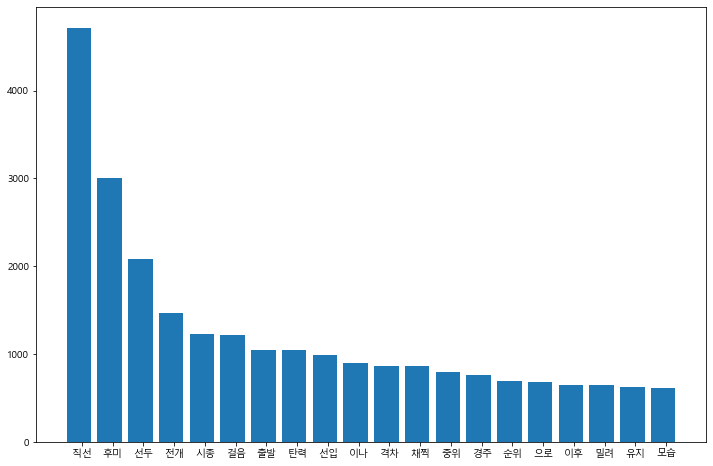

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

labels, values = zip(*morphs_list)
indexes = np.arange(len(labels))
width = 1

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(indexes, values,width=[0.8],align='edge')
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [18]:
ccorpus = []
for x, y in zip(morphs_review_df2, df2['ord']) :
    ccorpus.append([x,y])
col_name = ['Review', 'Ord']
df_c = pd.DataFrame(ccorpus, columns=col_name)
df_c.head()

,Review,Ord
0,"[주행, 중지, :, 출발, 후, 약, 200, M, 지점, 기수, 낙마]",92
1,"[후미, 권, 이끌었고, 직선, 순위, 도약, 시도, 나, 추, 입력, 발휘, 안,...",7
2,"[선행, 으로, 경주, 를, 주도했으나, 직선, 막판, 근소, 한, 차이, 로, 덜...",2
3,"[경, 주, 전반, 에, 걸쳐, 후미, 권, 을, 벗어나지, 못, 하고, 따라가는,...",10
4,"[선두, 권, 을, 압박, 하며, 따라갔으나, 4, 코너, 부터, 격차, 벌어지며,...",6


In [19]:
pieces = dict(list(df_c.groupby('Ord')))

piec_R = pieces[1].Review
piec = piec_R.tolist()
list_corpus_piec1 = []
    
for x in piec :
    list_corpus_piec1.append(x)
    
merged_piec = list(itertools.chain.from_iterable(list_corpus_piec1))

count_piec = Counter(merged_piec)
remove_char_piec = Counter({x : count_piec[x] for x in count_piec if len(x) > 1})
morphs_list_piec1 = remove_char_piec.most_common(20)
print(morphs_list_piec1)

[('직선', 413), ('선두', 269), ('우승', 192), ('탄력', 188), ('경주', 162), ('선행', 156), ('전개', 150), ('으로', 137), ('후미', 130), ('유지', 99), ('부상', 93), ('선입', 92), ('격차', 71), ('시종', 69), ('선행마', 63), ('주도했고', 56), ('보이', 53), ('중위', 51), ('하며', 46), ('이후', 45)]


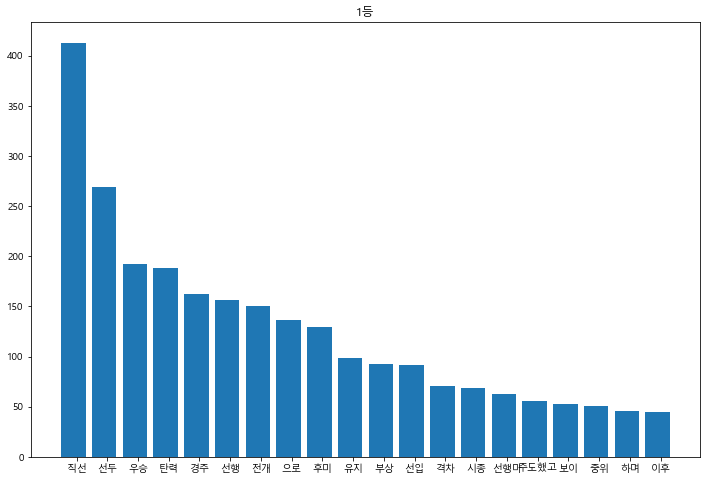

In [25]:
labels, values = zip(*morphs_list_piec1)
indexes = np.arange(len(labels))
width = 1

plt.title('1등')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(indexes, values,width=[0.8],align='edge')
plt.xticks(indexes + width * 0.5, labels)
plt.show()

[('후미', 35), ('직선', 28), ('전개', 20), ('순위', 17), ('모습', 16), ('시종', 15), ('처짐', 15), ('이후', 14), ('출발', 14), ('코너', 13), ('이나', 13), ('선두', 11), ('걸음', 10), ('밀렸고', 9), ('무뎌져', 9), ('하위', 9), ('경주', 8), ('할수록', 8), ('주행', 8), ('초반', 8)]


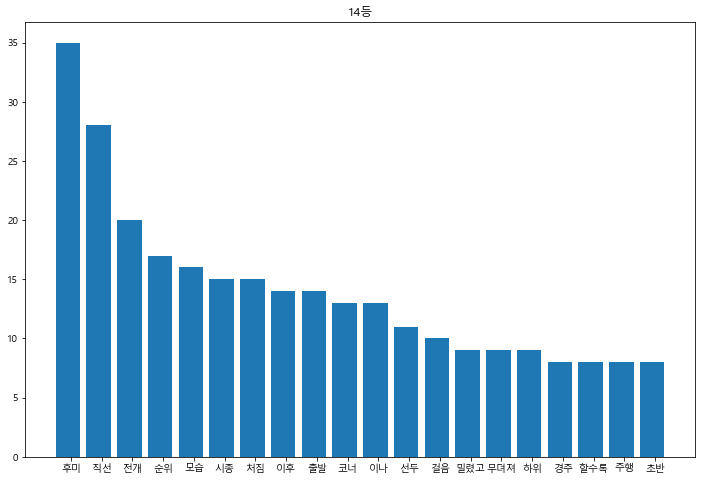

In [24]:
pieces = dict(list(df_c.groupby('Ord')))

piec_R = pieces[14].Review
piec = piec_R.tolist()
list_corpus_piec14 = []
    
for x in piec :
    list_corpus_piec14.append(x)
    
merged_piec = list(itertools.chain.from_iterable(list_corpus_piec14))

count_piec = Counter(merged_piec)
remove_char_piec = Counter({x : count_piec[x] for x in count_piec if len(x) > 1})
morphs_list_piec14 = remove_char_piec.most_common(20)
print(morphs_list_piec14)

labels, values = zip(*morphs_list_piec14)
indexes = np.arange(len(labels))
width = 1

plt.title('14등')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(indexes, values,width=[0.8],align='edge')
plt.xticks(indexes + width * 0.5, labels)
plt.show()

[('출전', 32), ('제외', 31), ('앞다리', 17), ('절음', 14), ('정지', 8), ('오른', 8), ('경주로', 6), ('입장', 6), ('기수', 5), ('낙마', 5), ('방마', 5), ('14일', 5), ('주행', 4), ('질병', 4), ('기타', 4), ('심사', 3), ('마체', 3), ('이상', 3), ('개월', 3), ('),(', 3)]


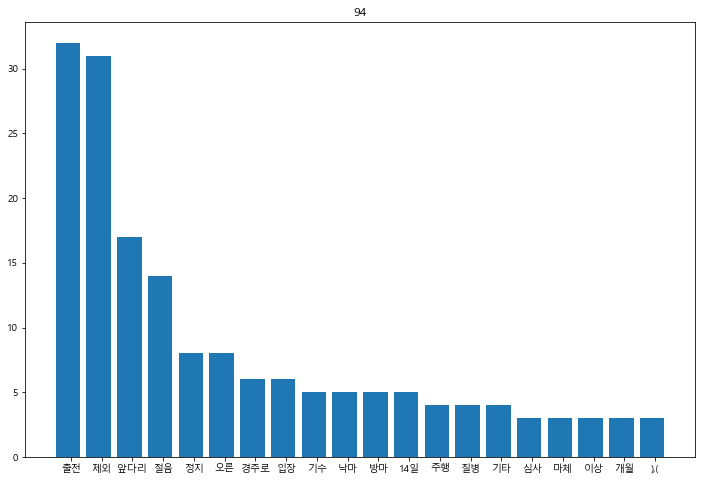

In [26]:
pieces = dict(list(df_c.groupby('Ord')))

piec_R = pieces[94].Review
piec = piec_R.tolist()
list_corpus_piec94 = []
    
for x in piec :
    list_corpus_piec94.append(x)
    
merged_piec = list(itertools.chain.from_iterable(list_corpus_piec94))

count_piec = Counter(merged_piec)
remove_char_piec = Counter({x : count_piec[x] for x in count_piec if len(x) > 1})
morphs_list_piec94 = remove_char_piec.most_common(20)
print(morphs_list_piec94)

labels, values = zip(*morphs_list_piec94)
indexes = np.arange(len(labels))
width = 1

plt.title('94')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(indexes, values,width=[0.8],align='edge')
plt.xticks(indexes + width * 0.5, labels)
plt.show()

[('후미', 35), ('직선', 28), ('전개', 20), ('순위', 17), ('모습', 16), ('시종', 15), ('처짐', 15), ('이후', 14), ('출발', 14), ('코너', 13), ('이나', 13), ('선두', 11), ('걸음', 10), ('밀렸고', 9), ('무뎌져', 9), ('하위', 9), ('경주', 8), ('할수록', 8), ('주행', 8), ('초반', 8)]


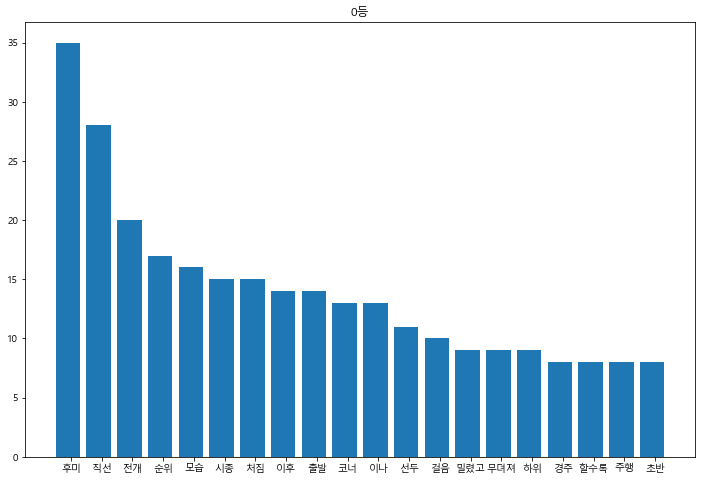

In [27]:
pieces = dict(list(df_c.groupby('Ord')))

piec_R = pieces[0].Review
piec = piec_R.tolist()
list_corpus_piec0 = []
    
for x in piec :
    list_corpus_piec0.append(x)
    
merged_piec = list(itertools.chain.from_iterable(list_corpus_piec14))

count_piec = Counter(merged_piec)
remove_char_piec = Counter({x : count_piec[x] for x in count_piec if len(x) > 1})
morphs_list_piec0 = remove_char_piec.most_common(20)
print(morphs_list_piec0)

labels, values = zip(*morphs_list_piec0)
indexes = np.arange(len(labels))
width = 1

plt.title('0등')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(indexes, values,width=[0.8],align='edge')
plt.xticks(indexes + width * 0.5, labels)
plt.show()